# Serial case

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import _lib.pr_func as pr
from _lib.utility import *
%config InlineBackend.figure_format = 'retina'
sns.set()

### Setup

In [4]:
# dimensions
N,M,K = 20,20,20
pr.set_dims([('w',N),('x',M),('a',K)])

# environment
U = pr.func(vars=['w','a'],val=gauss_utility(N,K,sigma=2.0))
pw = pr.func(vars=['w'],val='unif').normalize()

# Lagrange multipliers
beta1 = 20.0    # first step, p(x) -> p(x|w)
beta2 = 10.0    # second step, p(a) -> p(a|x)

### Blahut-Arimoto iteration

In [5]:
# initializations
px = pr.func(vars=['x'], val='unif').normalize()
pa = pr.func(vars=['a'], val='unif').normalize()
F = pr.func('f(w,x)', val='rnd')
pxgw_temp = 0

# BA iteration
for i in range(0,10000):
    pxgw = (px*pr.exp(beta1*F)).normalize(['x'])
    px = pr.sum(pw*pxgw,['w'])
    pwgx = (pxgw*pw)/px
    pagx = (pa*pr.exp(beta2*pr.sum(pwgx*U,['w']))).normalize(['a'])
    pa = pr.sum(pxgw*pw*pagx,['w','x'])
    F = pr.sum(pagx*(U-pr.log(pagx/pa)/beta2),['a'])
    
    # stopping condition
    if np.linalg.norm(pxgw.val-pxgw_temp)<1e-15: break
    pxgw_temp = pxgw.val

### Results

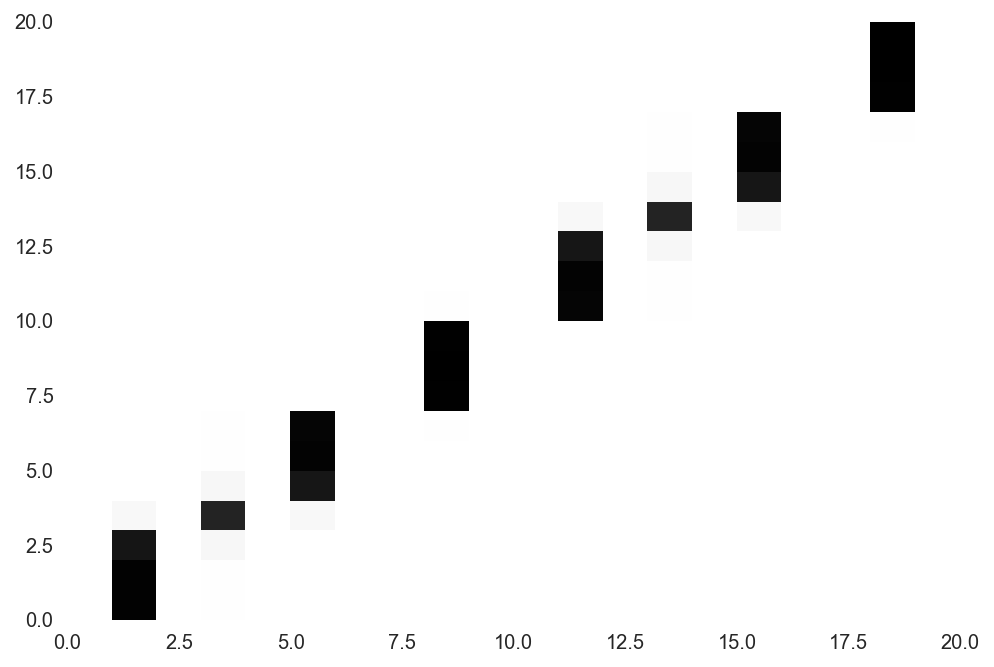

DKL1 = 2.817, DKL2 = 2.736, EU = 0.919, FE = 0.504


In [6]:
# calc and plot p(a|w)
pagw = pr.sum(pxgw*pagx,['x'])
plt.pcolor(pagw.val,cmap="Greys")
plt.show()

# calc and print stats
DKL1 = pr.sum(pw*pxgw*pr.log(pxgw/px)).val/np.log(2)        # DKL of the first step
DKL2 = pr.sum(pw*pxgw*pagx*pr.log(pagx/pa)).val/np.log(2)   # DKL of the second step
EU = pr.sum(pw*pagw*U).val                                  # expected utility
FE = EU - DKL1/beta1 - DKL2/beta2                           # free energy
print "DKL1 = {:.3f}, DKL2 = {:.3f}, EU = {:.3f}, FE = {:.3f}".format(DKL1,DKL2,EU,FE)